## Preprocess

In this notebook we preprocess the EM data from [here](https://www.epfl.ch/labs/cvlab/data/data-em/) to get it in a format suitable for SAM training.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from pathlib import Path

In [17]:
tnia_images_path = Path(r"D:\images")
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_04_09_SAM_training')

large_images = tifffile.imread(parent_path / 'training.tif')
large_masks = tifffile.imread(parent_path / 'training_groundtruth.tif')

In [18]:
print(large_images.shape, large_masks.shape)

(165, 768, 1024) (165, 768, 1024)


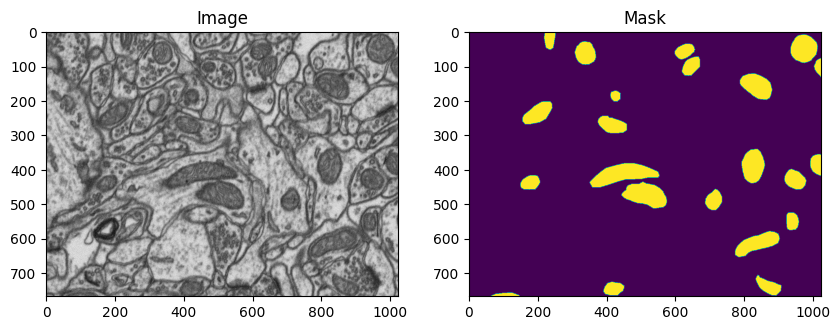

In [19]:
from tnia.plotting.plt_helper import imshow_multi2d

fig = imshow_multi2d([large_images[0], large_masks[0]], ['Image', 'Mask'], 1, 2, colormaps=['gray', 'viridis'])

In [20]:
from segment_everything.stacked_labels import StackedLabels

In [21]:
stacked_labels = StackedLabels.from_2d_label_image(large_masks[0], large_images[0])

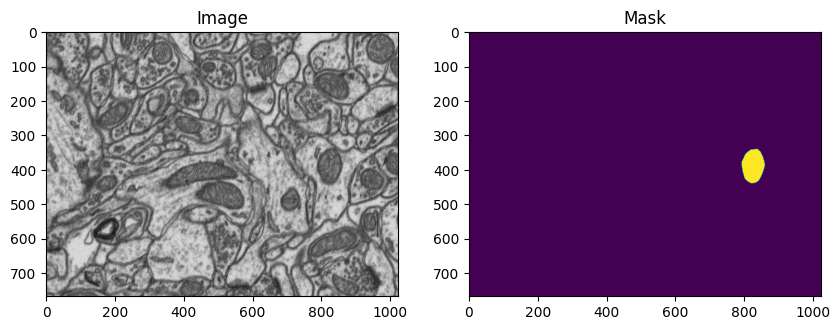

In [22]:
n=10
fig = imshow_multi2d([large_images[0], stacked_labels.mask_list[n]['segmentation']], ['Image', 'Mask'], 1, 2, colormaps=['gray', 'viridis'])

In [23]:
import pickle

pickle_name = parent_path / 'stacked_labels_epfl_em.pkl'

with open(pickle_name, 'wb') as f:
    pickle.dump(stacked_labels, f)

In [24]:
print(len(stacked_labels.mask_list))

22


In [25]:
stacked_labels.image.shape

(768, 1024, 3)

In [26]:
import napari
from  napari_segment_everything import segment_everything
viewer = napari.Viewer()
segment_everything_widget=segment_everything.NapariSegmentEverything(viewer)
viewer.window.add_dock_widget(segment_everything_widget)
segment_everything_widget.load_project(stacked_labels.image, stacked_labels.mask_list)


area 591 8006
label_num 1 22
solidity 0.8907432131731197 0.9832847424684159
circularity 0.2636542301407341 0.8991655011808436
mean_intensity 104.23424068767908 112.77344081459482
10th_percentile_intensity 87.0 94.0
mean_hue 0.0 0.0
mean_saturation 0.0 0.0
predicted_iou 1 1
stability_score 1 1
